In [36]:
in_file =r'../../data/clean/articles.csv' 

import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
articles=pd.read_csv(in_file,index_col=False)
articles.CR.fillna('',inplace=True)
df_ref=articles.CR
refs_dict={}
i=0
for ref in df_ref:
    refs_dict[i]=[ref for ref in ref.split('; ')]
    i=i+1

In [12]:
cite = open('cite_all.csv', 'w')
cite.write('citing,cited\n')

for row in refs_dict:
    for ref in refs_dict[row]:
        cite.write(str(row)+','+ ref.replace(',','')+'\n')
cite.close()

In [4]:
cite_all=pd.read_csv('cite_all.csv')
cite_all.fillna('',inplace=True)

In [ ]:
dg=cite_all.groupby('cited').count()
dg1=dg[dg.citing==1]
dg=dg[dg.citing>2]
dg.reset_index(inplace=True)

In [ ]:
cite_all['cited_id']=-1
i=0
dg_cited=dg.cited.values
for x in cite_all.cited:
    try:
        ind=dg[dg.cited==x].index[0]
        cite_all.set_value(i,'cited_id',ind)
    except:
        pass
    i=i+1
    if i % 1000 ==0:
        print i,
print

In [11]:
cite_all=cite_all[cite_all.cited_id>-1]

In [1]:
df=cite_all[['citing','cited_id']]
df.to_csv('cite_all_id.csv')

NameError: name 'cite_all' is not defined

In [55]:
df=pd.read_csv('cite_all_id.csv',index_col='Unnamed: 0')

In [56]:
x=df.citing.max()
y=df.cited_id.max()
mm=np.zeros((x+1,y+1))
mm.shape

(1207, 11622)

In [31]:
for row in df.iterrows():
    mm[row[1][0],row[1][1]]=1

In [32]:
#bib=np.triu(np.dot(mm,mm.transpose()),1)
bib = 1-pairwise_distances(mm, metric="cosine")
bib = np.round(np.triu(bib,1),3)
bib

array([[ 0.   ,  0.112,  0.   , ...,  0.015,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]])

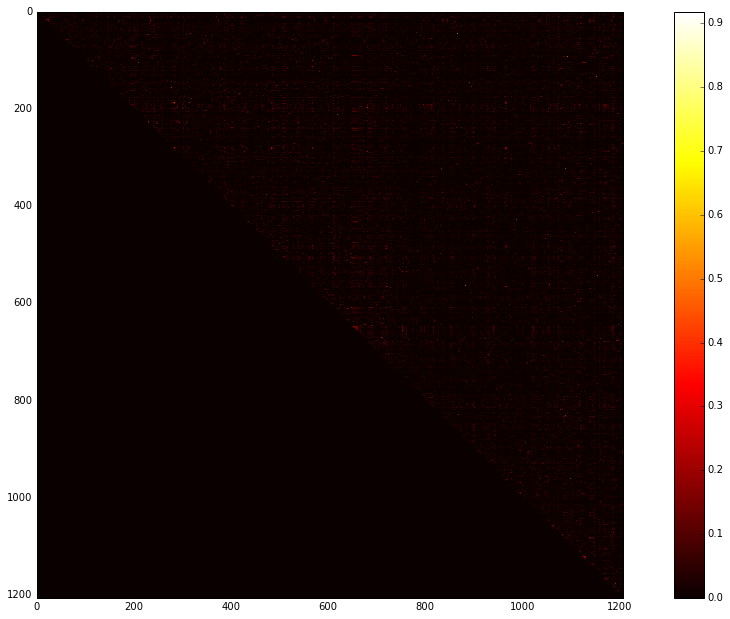

In [37]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.imshow(bib, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [45]:
biblio = open('bib.csv', 'w')
biblio.write('source,target,weight,type\n')

for row in range(bib.shape[0]):
    for col in range(row,bib.shape[1]):
        if bib[row][col] > .01:
            biblio.write(str(row)+','+str(col)+','+str(bib[row][col])+',undirected\n')
biblio.close()

In [46]:
df=pd.read_csv('bib.csv')
df[df.weight>.7]

,source,target,weight,type
26378,129,137,0.802,undirected
41970,212,618,0.816,undirected
64112,341,1195,0.918,undirected
94247,552,680,0.735,undirected
127293,937,1012,0.705,undirected


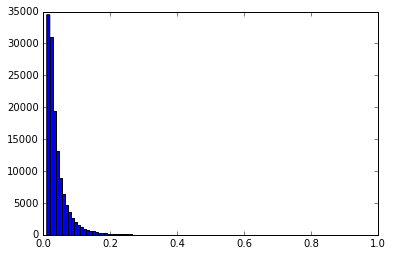

In [47]:
l=df.weight
hist=plt.hist(l,100)

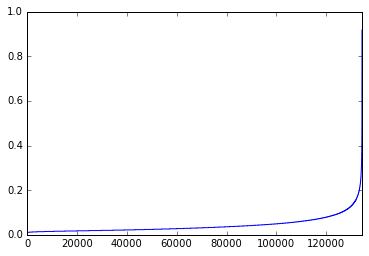

In [48]:
l=l.sort_values()
l=l.reset_index(drop=True)
l.plot(drawstyle='steps')

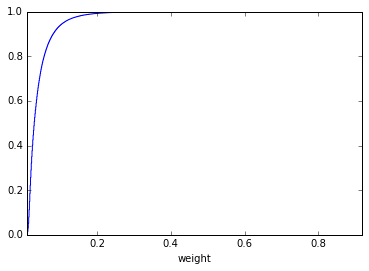

In [49]:
cum_dist = np.linspace(0.,1.,len(l))
cdf = pd.Series(cum_dist, index=l)
cdf.plot()

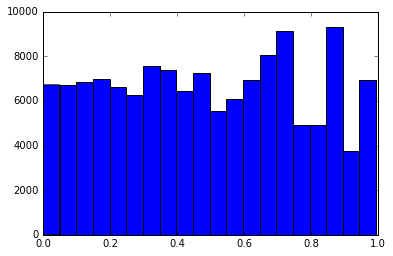

In [50]:
dic=cdf.to_dict()
df['p']=df.weight.apply(lambda x :1- dic[x])
p=df[df.weight>0].p
binwidth=.01
hist=plt.hist(p,20)

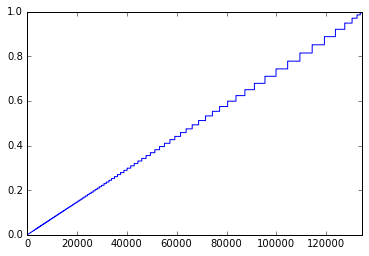

In [51]:
p=df.p
p=p.sort_values()
p=p.reset_index(drop=True)
p.plot(drawstyle='steps')

(134388, 5)